#apés avoir testé sur plusieurs colonnes de cet ensemble de donnée , nous sommes enfin arrivées à aboutir notre solution .
#Vu que le modéle/dataSet ne contient pas de colonne contextuelle , ça nous a posé de gros problémes en appliquant et impléméntant notre proposition(Solution).
#Aprés les statistiques et les caractéristiques qui ont dont ce data , nous remarquons que la colonne Weight influence sur ce dernier.
#néanmoins , nous avons avons testé avec d'autres colonnes mais la derniére(Weight) a servi .

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


les informations qui contient cet ensemble .

In [ ]:
df = pd.read_csv("/content/Drive/MyDrive/context awareness datasets/shipment tracking dataset/data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


Visualiser la classe à prédire et voir comment elle est répartie

In [ ]:
sizes = df['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


#Visualisation 

([<matplotlib.patches.Wedge at 0x7faa493efb90>,
 [Text(-0.3290237775458344, 1.0496396304491695, ''),
  Text(0.3290237775458339, -1.0496396304491697, '')],
 [Text(-0.17946751502500058, 0.5725307075177288, '59.7%'),
  Text(0.17946751502500027, -0.5725307075177289, '40.3%')])

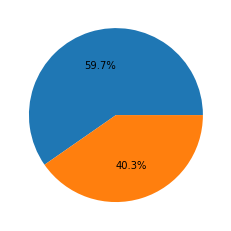

In [ ]:
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Vu que le ID n'est pas pertinent , nous l'eliminons donc!!

In [ ]:
df.drop(['ID'], axis=1, inplace=True)

df.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
5,F,Flight,3,1,162,3,medium,F,12,1417,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
7,F,Flight,4,1,233,2,low,F,48,2804,1
8,A,Flight,3,4,150,3,low,F,11,1861,1
9,B,Flight,3,2,164,3,medium,F,29,1187,1


#Nous essayons maintenant de rendre les classes de prédiction egaux , comme ça lors d'entrainer et de valider notre modéle , il sera equilibré 

In [ ]:
df_reached = df[df['Reached.on.Time_Y.N'] == 0]
df_not_reached = df[df['Reached.on.Time_Y.N'] == 1]

In [ ]:
df_reached_downsampled = resample(df_reached,replace=False,n_samples=4000,random_state=25) 
df_not_reached_downsampled = resample(df_not_reached,replace=False,n_samples=4000,random_state=25) 

In [ ]:
df_downsampled = pd.concat([df_not_reached_downsampled,df_reached_downsampled])
print(len(df_downsampled))

8000


#Parfait , une fois la répartition des classe est bien équilibrée , nous passons à la conversion des attributs catégoriels en attributs numiriques .

In [ ]:
sizes = df_downsampled['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)
#plt.pie(sizes, autopct='%1.1f%%')

1    4000
0    4000
Name: Reached.on.Time_Y.N, dtype: int64


nous avons pris les 10 premiéres lignes de cet data pour tavailler sur.

In [ ]:
df_downsampled.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,medium,F,23,2837,1
2529,B,Ship,2,1,255,3,low,M,19,1551,1
1073,F,Road,3,1,148,2,medium,M,34,1053,1
9432,D,Road,6,3,271,4,low,F,2,1364,1
2539,F,Ship,2,5,252,2,low,F,21,2070,1
10650,D,Ship,4,4,239,3,medium,F,7,5297,1
1377,B,Flight,4,3,258,2,high,M,11,2252,1
7252,C,Road,5,4,257,3,medium,F,3,4895,1
1170,D,Ship,5,1,198,5,medium,F,49,3187,1
10574,A,Ship,3,2,144,4,medium,M,8,4867,1


Nous commençons d'abord par convertir les attributs Gender et Porduct_importance

In [ ]:
df_downsampled.Product_importance[df_downsampled.Product_importance == 'low'] = 1
df_downsampled.Product_importance[df_downsampled.Product_importance == 'medium'] = 2
df_downsampled.Product_importance[df_downsampled.Product_importance == 'high'] = 3

df_downsampled.Gender[df_downsampled.Gender == 'F'] = 0
df_downsampled.Gender[df_downsampled.Gender == 'M'] = 1

In [ ]:
df_downsampled.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,2,0,23,2837,1
2529,B,Ship,2,1,255,3,1,1,19,1551,1
1073,F,Road,3,1,148,2,2,1,34,1053,1
9432,D,Road,6,3,271,4,1,0,2,1364,1
2539,F,Ship,2,5,252,2,1,0,21,2070,1
10650,D,Ship,4,4,239,3,2,0,7,5297,1
1377,B,Flight,4,3,258,2,3,1,11,2252,1
7252,C,Road,5,4,257,3,2,0,3,4895,1
1170,D,Ship,5,1,198,5,2,0,49,3187,1
10574,A,Ship,3,2,144,4,2,1,8,4867,1


#Voila , les colonnes sont converties , nous terminerons le reste

Reste encore l'attribut Warehouse _block et Mode_of_shipment

In [ ]:
df_encoded=pd.get_dummies(df_downsampled,columns=['Warehouse_block','Mode_of_Shipment'])
df_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
2554,5,5,264,3,2,0,23,2837,1,0,0,1,0,0,0,0,1
2529,2,1,255,3,1,1,19,1551,1,0,1,0,0,0,0,0,1
1073,3,1,148,2,2,1,34,1053,1,0,0,0,0,1,0,1,0
9432,6,3,271,4,1,0,2,1364,1,0,0,0,1,0,0,1,0
2539,2,5,252,2,1,0,21,2070,1,0,0,0,0,1,0,0,1


#aprés avoir converti les attribut et voir que le data contient que des attributs numiriques d'ou le modéle est enfin prêt .
#Nous appliquerons directement notre Solution

#Comme nous l'avons déjà mentionné en haut , nous avons testé sur plusieurs colonnes pour arriver à notre but.
#La colonne qui a donné un résulat perfermant et plus fiable  , c'est bien "Weight".

***Comme nous avons l'habitude de faire :***

**divisé la colonne en sous ensemble(catégorie) comme suit:***
# 1.Sous ensemble : Weight <= 2000
# 2.Sous ensemble : Weight >2000 & Weight <=4000
# 3.Sous ensemble : Weight >4000 & Weight <= 5000
# 4.Sous ensemble : Weight >5000

In [ ]:
df1=df_encoded.loc[(df_encoded['Weight_in_gms'] <=2000)]
df2=df_encoded.loc[(df_encoded['Weight_in_gms'] >2000 ) & (df['Weight_in_gms'] <=4000)]
df3=df_encoded.loc[(df_encoded['Weight_in_gms'] >4000 ) & (df['Weight_in_gms'] <=5000)]
df4=df_encoded.loc[(df_encoded['Weight_in_gms'] >5000 ) ]


La taille de chaque sous ensemble 

In [ ]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))

2269
1094
2374
2263


In [ ]:
X1 = df1.drop("Reached.on.Time_Y.N", axis = 1)
Y1 = df1['Reached.on.Time_Y.N']

X2 = df2.drop("Reached.on.Time_Y.N", axis = 1)
Y2 = df2['Reached.on.Time_Y.N']

X3 = df3.drop("Reached.on.Time_Y.N", axis = 1)
Y3 = df3['Reached.on.Time_Y.N']

X4 = df4.drop("Reached.on.Time_Y.N", axis = 1)
Y4 = df4['Reached.on.Time_Y.N']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42,shuffle = True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42,shuffle = True)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42,shuffle = True)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42,shuffle = True)

#entrainer et mdoéliser le premier sous_ensemble
#Nous avons testé et travaillé avec l'algorithme RandomForest Vu que il a dooné un bon résultat


In [ ]:
model1 =  RandomForestClassifier()

In [ ]:
model1.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#prédiction
prediction_test1 = model1.predict(X_test1)


In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1))

Accuracy =  0.7290748898678414


#Nous essayons d'améliorer l'accuracy du premier sous_ensemble

In [ ]:
#validation croisée 
param_grid = [
              {'criterion': ['gini', 'entropy'],
                          'max_depth': list(range(3,25)),
                          'n_estimators': list(range(95,113))}
                       ]

In [ ]:
optimal_params1 = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2)

In [ ]:
optimal_params1.fit(X_train1,y_train1,)

Fitting 3 folds for each of 792 candidates, totalling 2376 fits
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.3s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=97, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=97, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] .

[Parallel(n_jobs=1)]: Done 2376 out of 2376 | elapsed: 10.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
print(optimal_params1.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 110}


In [ ]:
model1_optimized=RandomForestClassifier(criterion='entropy',max_depth=3,n_estimators=110)

In [ ]:
model1_optimized.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test1_optimized = model1_optimized.predict(X_test1)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1_optimized))

Accuracy =  0.7444933920704846


In [ ]:
#matrice de confusion 
cm1 = metrics.confusion_matrix(y_test1,prediction_test1_optimized)
print(cm1)

[[159  12]
 [104 179]]


In [ ]:
#sauvegarder le modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/RF/model 1 optimized acc_74_449.sav'
pickle.dump(model1_optimized, open(filename, 'wb'))


#entrainer le deuxiéme sous-ensemble

In [ ]:
model2 =  RandomForestClassifier()

In [ ]:
model2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test2 = model2.predict(X_test2)


In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2))

Accuracy =  1.0


In [ ]:
#matrice de confusion 
cm2 = metrics.confusion_matrix(y_test2,prediction_test2)
print(cm2)


[[219]]


In [ ]:
#sauvegarder le deuxiéme modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/RF/model 2 optimized acc_100_000.sav'
pickle.dump(model2, open(filename, 'wb'))

#entrainer le troisiéme modéle 

In [ ]:
model3 =  RandomForestClassifier()

In [ ]:
model3.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test3 = model3.predict(X_test3)


In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3))

Accuracy =  0.6210526315789474


In [ ]:
optimal_params2 = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2)

In [ ]:
#validation croisée 
optimal_params2.fit(X_train3,y_train3)

Fitting 3 folds for each of 792 candidates, totalling 2376 fits
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=97, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=97, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] .

[Parallel(n_jobs=1)]: Done 2376 out of 2376 | elapsed: 12.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:

print(optimal_params2.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 111}


In [ ]:
model3_optimized=RandomForestClassifier(criterion='gini',max_depth=3 , n_estimators=111)


In [ ]:
model3_optimized.fit(X_train3,y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=111,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test3_optimized = model3_optimized.predict(X_test3)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3_optimized))

Accuracy =  0.64


In [ ]:
#matrice de confusion 
cm2 = metrics.confusion_matrix(y_test3,prediction_test3_optimized)
print(cm2)

[[304   0]
 [171   0]]


In [ ]:
#sauvegarder le deuxiéme modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/RF/model 3 optimized acc_64_000.sav'
pickle.dump(model3_optimized, open(filename, 'wb'))

In [ ]:
model4 =  RandomForestClassifier()

In [ ]:
model4.fit(X_train4, y_train4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test4 = model4.predict(X_test4)


In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4))

Accuracy =  0.6534216335540839


In [ ]:
optimal_params2 = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2)


In [ ]:

#validation croisée 
optimal_params2.fit(X_train4,y_train4)

Fitting 3 folds for each of 792 candidates, totalling 2376 fits
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=95 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=95, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=96 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=96, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=97, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] ..... criterion=gini, max_depth=3, n_estimators=97, total=   0.2s
[CV] criterion=gini, max_depth=3, n_estimators=97 ....................
[CV] .

[Parallel(n_jobs=1)]: Done 2376 out of 2376 | elapsed: 11.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [ ]:
print(optimal_params2.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 95}


In [ ]:
model4_optimized=RandomForestClassifier(criterion='gini',max_depth=6 , n_estimators=95)


In [ ]:
model4_optimized.fit(X_train4,y_train4)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test4_optimized = model4_optimized.predict(X_test4)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4_optimized))


Accuracy =  0.6556291390728477


In [ ]:
#matrice de confusion 
cm2 = metrics.confusion_matrix(y_test4,prediction_test4_optimized)
print(cm2)


[[294   1]
 [155   3]]


In [ ]:
#sauvegarder le 4eme modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/RF/model 4 optimized acc_65_562.sav'
pickle.dump(model4_optimized, open(filename, 'wb'))

#Aprés avoir testé et entrainé chaque sous-ensemble , maintenant nous passons à la Combainaison des modéles 


à partir des expérimentations ci-dessus, nous voyons que le contexte comprend que la précision des modèles dépasse le modèle général où le poids (Weight) du produit est <=2000 et lorsque le poids est compris entre (2000>poids<=4000) mais que la précision générale du modèle l'emporte lorsque le poid  du produit est compris entre 4000 et 5000 ([4000 5000]).
***
dans les cellules qui suivent, nous allons essayer de tester nos modèles de prise de conscience des contextes avec le modèle général sur le même ensemble de tests que nous avons testé dans le modèle général et voir si la précision augmentera.
***

In [ ]:
X=df_encoded.drop('Reached.on.Time_Y.N',axis=1).copy()

Y=df_encoded['Reached.on.Time_Y.N'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35)

In [ ]:
df_test = X_test

In [ ]:
df_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
8334,6,4,275,4,1,1,10,1005,0,0,0,1,0,0,1,0
8438,6,5,246,5,3,0,3,4660,1,0,0,0,0,0,0,1
3086,3,2,223,2,1,1,64,3595,1,0,0,0,0,0,0,1
8592,4,1,167,4,3,1,7,5264,0,0,0,1,0,0,0,1
10819,4,4,249,3,2,0,4,5809,0,0,0,0,1,1,0,0


In [ ]:
y_test.head()

8334     0
8438     1
3086     1
8592     0
10819    1
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df_test['Reached.on.Time_Y.N']=y_test

In [ ]:
df_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Reached.on.Time_Y.N
8334,6,4,275,4,1,1,10,1005,0,0,0,1,0,0,1,0,0
8438,6,5,246,5,3,0,3,4660,1,0,0,0,0,0,0,1,1
3086,3,2,223,2,1,1,64,3595,1,0,0,0,0,0,0,1,1
8592,4,1,167,4,3,1,7,5264,0,0,0,1,0,0,0,1,0
10819,4,4,249,3,2,0,4,5809,0,0,0,0,1,1,0,0,1


In [ ]:
df_test_1=df_test.loc[(df_test['Weight_in_gms'] <=2000) ]

df_test_2=df_test.loc[(df_test['Weight_in_gms'] >2000 ) & (df['Weight_in_gms'] <=4000)]

df_test_3=df_test.loc[(df_test['Weight_in_gms'] >4000 )]

In [ ]:
X1_test = df_test_1.drop("Reached.on.Time_Y.N", axis = 1)
Y1_test = df_test_1['Reached.on.Time_Y.N']

X2_test = df_test_2.drop("Reached.on.Time_Y.N", axis = 1)
Y2_test = df_test_2['Reached.on.Time_Y.N']

X3_test = df_test_3.drop("Reached.on.Time_Y.N", axis = 1)
Y3_test = df_test_3['Reached.on.Time_Y.N']




In [ ]:
X1_test_train1, X1_test_test1, Y1_test_train1, Y1_test_test1 = train_test_split(X1_test, Y1_test, test_size=0.2, random_state=35)

X2_test_train2, X2_test_test2, Y2_test_train2, Y2_test_test2 = train_test_split(X2_test, Y2_test, test_size=0.2, random_state=35)

X3_test_train3, X3_test_test3, Y3_test_train3, Y3_test_test3 = train_test_split(X3_test, Y3_test, test_size=0.2, random_state=35)




In [ ]:
CA_model1=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/RF/model 1 optimized acc_74_449.sav', 'rb'))
CA_model2=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/RF/model 2 optimized acc_100_000.sav', 'rb'))
G_model=pickle.load(open('/content/Drive/MyDrive/e-comerce model/model_RF_ecommerce_73-875.sav', 'rb'))



In [ ]:
prediction_test_test1 = CA_model1.predict(X1_test_test1)

prediction_test_test2 = CA_model2.predict(X2_test_test2)

prediction_test_test3 = G_model.predict(X3_test_test3)

In [217]:
print ("La précision de la classe(Accuracy) du premier modéle   = ", metrics.accuracy_score(Y1_test_test1, prediction_test_test1))

print ("La précision de la classe(Accuracy) du deuxiéme  modéle = ", metrics.accuracy_score(Y2_test_test2, prediction_test_test2))

print ("La précision de la classe(Accuracy) du  modéle  général= ", metrics.accuracy_score(Y3_test_test3, prediction_test_test3))



La précision de la classe(Accuracy) du premier modéle   =  0.7802197802197802
La précision de la classe(Accuracy) du deuxiéme  modéle =  1.0
La précision de la classe(Accuracy) du  modéle  général=  0.6868131868131868


In [ ]:
overall_acc = (metrics.accuracy_score(Y1_test_test1, prediction_test_test1)+metrics.accuracy_score(Y2_test_test2, prediction_test_test2)+metrics.accuracy_score(Y3_test_test3, prediction_test_test3))/3


In [218]:
print ("La précision globale des modèles combinés = ", overall_acc)

La précision globale des modèles combinés =  0.8223443223443224


#Une bonne amélioration !! 

à partir des dernières expériences, nous avons constaté des améliorations de la précision lorsque nous avons utilisé une approche de sensibilisation au contexte
de 73% à 82%.
ce n'est pas tellement, peut-être que si nous utilisions différents ensembles de données ou colonnes de contexte ou même une division différente, nous pourrions avoir plus de précision, mais cela prouve toujours l'efficacité de l'utilisation de la conscience du contexte dans l'apprentissage automatique et l'intelligence artificielle en général.